# Task 1

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import pandas as pd
import time
import matplotlib.pyplot as plt

Optimal MLP model mnist (used in task 2)

In [2]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

X_train_full = X_train_full.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train_full = X_train_full.astype('float32')
X_test = X_test.astype('float32')
X_train_full /= 255
X_test /= 255

batch_size = 128
num_classes = 10
epochs = 40

y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.models.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(784,), kernel_initializer = "glorot_normal"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(512, activation='relu', kernel_initializer = "glorot_normal"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer = keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999),
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train_full, y_train_full,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb])

score1 = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

model.save("my_keras_model.h5")
history_MLP = history

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 7s 118us

Optimal CNN model mnist (used in task 2)

In [8]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

batch_size = 128
num_classes = 10
epochs = 40

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=input_shape, activation="relu", kernel_initializer = "random_uniform"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(keras.layers.Dense(128, activation="relu", kernel_initializer = "random_uniform"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10,activation="softmax"))

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),             
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[checkpoint_cb, early_stopping_cb])

score2 = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

model.save("my_keras_model.h5")
history_CNN = history

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 20s 337us/sample - loss: 0.2860 - accuracy: 0.9141 - val_loss: 0.0880 - val_accuracy: 0.9730
Epoch 2/40
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0908 - accuracy: 0.9727 - val_loss: 0.0542 - val_accuracy: 0.9817
Epoch 3/40
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0606 - accuracy: 0.9824 - val_loss: 0.0542 - val_accuracy: 0.9814
Epoch 4/40
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0463 - accuracy: 0.9861 - val_loss: 0.0402 - val_accuracy: 0.9861
Epoch 5/40
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0378 - accuracy: 0.9888 - val_loss: 0.0371 - val_accuracy: 0.9872
Epoch 6/40
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0308 - accuracy: 0.9909 - val_loss: 0.0395 - val_accuracy: 0.9868
Epoch 7/40
60000/60000 [====================

Plot function for comparing models

In [55]:
import matplotlib.pyplot as plt

def plot_parameters(parameter_list_names, hist_list, accuracy ='val_accuracy', loss = 'val_loss', yab = 1, yal = 5):

    for i in range(0,len(hist_list)):
        plt.plot(hist_list[i].history[accuracy], label=parameter_list_names[i])
        plt.legend()
    plt.title('CNN fashion MNIST accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim(0, yab)
    plt.savefig('task1_CNN_fash_optim_acc', dpi=300)
    plt.figure(figsize=(20,10)) 
    plt.show(.5, 1)
    
    for i in range(0,len(hist_list)):
        plt.plot(hist_list[i].history[loss], label=parameter_list_names[i])
        plt.legend()
    plt.title('CNN fashion MNIST loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.ylim(0, yal)
    plt.savefig('task1_CNN_fash_optim_loss', dpi=300)
    plt.figure(figsize=(20,10))
    plt.show()

Function to compare MLP mnist models 

In [25]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

batch_size = 128
num_classes = 10
epochs = 20

X_train_full = X_train_full.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train_full = X_train_full.astype('float32')
X_test = X_test.astype('float32')
X_train_full /= 255
X_test /= 255
batch_size = 128
num_classes = 10
epochs = 20


def MLP_model_parameter_tweaker(optimizer_list = [keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)]*10,
                           activation_list = ["relu"]*10,
                           initializer_list = ['random_uniform']*10,
                           names = ["nothing is tested"]*10,
                           what_is_tested = "no name specified", 
                           epoch = 10):
    df = pd.DataFrame(columns = [what_is_tested, "time", "accuracy", "loss"])
    history_list = []
    epochs = epoch
    for i in range(0,len(names)):
    

    
        t0 = time.time()

        model = keras.models.Sequential([
            keras.layers.Dense(512,  activation=activation_list[i], kernel_initializer = initializer_list[i], input_shape=(784,)),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(512,  activation=activation_list[i], kernel_initializer = initializer_list[i]),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(num_classes, kernel_initializer = initializer_list[i],  activation='softmax')
        ])



        model.compile(loss='sparse_categorical_crossentropy',
                  optimizer = optimizer_list[i],
                  metrics=['accuracy'])


        history = model.fit(X_train_full, y_train_full,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_test, y_test))
        score = model.evaluate(X_test, y_test, verbose=0)
        t1 = time.time()
        total = t1-t0
        

        df.loc[i,what_is_tested] = names[i]
        df.loc[i,"time"] = total
        df.loc[i,"accuracy"] = score[1]
        df.loc[i,"loss"] = score[0]
        history_list.append(history)
        
    print(plot_parameters(names, hist_list=history_list))
    print(df.sort_values(by=['accuracy'],ascending=False))
    


optimizers

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/sample - loss: 1.9659 - accuracy: 0.4794 - val_loss: 1.3030 - val_accuracy: 0.7514
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.8981 - accuracy: 0.7839 - val_loss: 0.5820 - val_accuracy: 0.8522
Epoch 3/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5610 - accuracy: 0.8432 - val_loss: 0.4310 - val_accuracy: 0.8880
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4613 - accuracy: 0.8681 - val_loss: 0.3704 - val_accuracy: 0.8968
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4116 - accuracy: 0.8813 - val_loss: 0.3383 - val_accuracy: 0.9065
Epoch 6/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3780 - accuracy: 0.8905 - val_loss: 0.3156 - val_accuracy: 0.9104
Epoch 7/10
60000/60000 [==============================] 

Epoch 4/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0667 - accuracy: 0.9799 - val_loss: 0.0681 - val_accuracy: 0.9784
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0533 - accuracy: 0.9831 - val_loss: 0.0594 - val_accuracy: 0.9816
Epoch 6/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.0588 - val_accuracy: 0.9816
Epoch 7/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0355 - accuracy: 0.9889 - val_loss: 0.0570 - val_accuracy: 0.9835
Epoch 8/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0290 - accuracy: 0.9907 - val_loss: 0.0572 - val_accuracy: 0.9818
Epoch 9/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0252 - accuracy: 0.9918 - val_loss: 0.0559 - val_accuracy: 0.9834
Epoch 10/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0216 - accuracy: 0.993

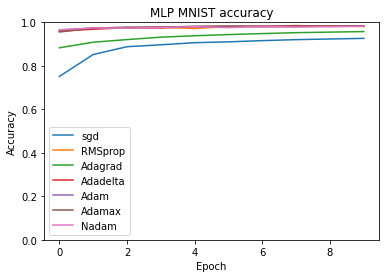

<Figure size 1440x720 with 0 Axes>

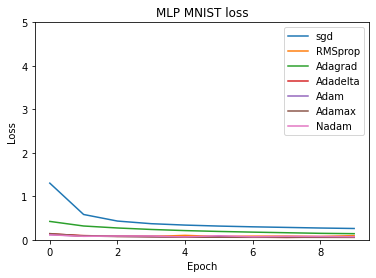

<Figure size 1440x720 with 0 Axes>

None
  optimizers     time accuracy       loss
5     Adamax  44.4326   0.9842  0.0551781
3   Adadelta  46.6174   0.9828  0.0590017
4       Adam  38.6928   0.9818  0.0696957
6      Nadam  67.3669   0.9818  0.0717772
1    RMSprop  50.5033   0.9813  0.0961735
2    Adagrad   40.177   0.9577   0.141047
0        sgd  37.3676   0.9264   0.259975


In [26]:
list_optimizers = ["sgd", 
                   keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9), 
                   keras.optimizers.Adagrad(learning_rate=0.01),
                   keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95), 
                   keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
                   keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999),
                   keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)]

optimizer_names = ["sgd", "RMSprop", "Adagrad", "Adadelta", "Adam", "Adamax", "Nadam"]

MLP_model_parameter_tweaker(optimizer_list = list_optimizers, names = optimizer_names, what_is_tested = "optimizers")

Activation functions

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3325 - accuracy: 0.8988 - val_loss: 0.1879 - val_accuracy: 0.9448
Epoch 2/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1737 - accuracy: 0.9472 - val_loss: 0.1256 - val_accuracy: 0.9622
Epoch 3/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1209 - accuracy: 0.9629 - val_loss: 0.1025 - val_accuracy: 0.9675
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0942 - accuracy: 0.9702 - val_loss: 0.0897 - val_accuracy: 0.9704
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0779 - accuracy: 0.9758 - val_loss: 0.0777 - val_accuracy: 0.9752
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0656 - accuracy: 0.9796 - val_loss: 0.0816 - val_accuracy: 0.9754
Epoch 7/10
60000/60000 [==============================] 

Epoch 4/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1281 - accuracy: 0.9612 - val_loss: 0.1127 - val_accuracy: 0.9658
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1057 - accuracy: 0.9671 - val_loss: 0.0981 - val_accuracy: 0.9707
Epoch 6/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0877 - accuracy: 0.9726 - val_loss: 0.0888 - val_accuracy: 0.9735
Epoch 7/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0755 - accuracy: 0.9764 - val_loss: 0.0775 - val_accuracy: 0.9752
Epoch 8/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0660 - accuracy: 0.9796 - val_loss: 0.0828 - val_accuracy: 0.9736
Epoch 9/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.0708 - val_accuracy: 0.9774
Epoch 10/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0517 - accuracy: 0.983

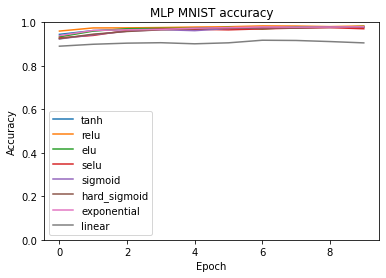

<Figure size 1440x720 with 0 Axes>

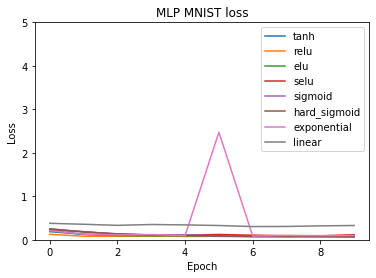

<Figure size 1440x720 with 0 Axes>

None
    activations     time accuracy       loss
1          relu  48.4184   0.9835  0.0908773
2           elu  49.7522   0.9812  0.0781256
6   exponential  50.7396   0.9799   0.098826
0          tanh  48.2801   0.9788  0.0675869
5  hard_sigmoid  51.9056   0.9783  0.0720667
4       sigmoid  50.3726   0.9779  0.0709869
3          selu  50.0725   0.9706   0.117157
7        linear  49.6291   0.9056   0.329061


In [23]:
list_activation_names = ["tanh", "relu", "elu", "selu", "sigmoid", "hard_sigmoid", "exponential", "linear"]

MLP_model_parameter_tweaker(activation_list = list_activation_names, names = list_activation_names, what_is_tested = "activations")

Initializors

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 2.3017 - accuracy: 0.1121 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/10
60000/60000 [==============================] - 5s 78us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/10
60000/60000 [==============================] - 5s 77us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 6/10
60000/60000 [==============================] - 5s 78us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/10
60000/60000 [==============================] 

Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0605 - accuracy: 0.9815 - val_loss: 0.0821 - val_accuracy: 0.9771
Epoch 5/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0502 - accuracy: 0.9850 - val_loss: 0.0798 - val_accuracy: 0.9774
Epoch 6/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0426 - accuracy: 0.9875 - val_loss: 0.0836 - val_accuracy: 0.9797
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0383 - accuracy: 0.9888 - val_loss: 0.0708 - val_accuracy: 0.9818
Epoch 8/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0340 - accuracy: 0.9899 - val_loss: 0.0802 - val_accuracy: 0.9813
Epoch 9/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0305 - accuracy: 0.9910 - val_loss: 0.0896 - val_accuracy: 0.9826
Epoch 10/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0295 - accuracy: 0.991

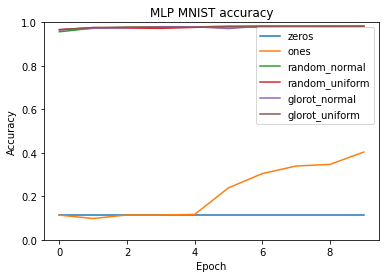

<Figure size 1440x720 with 0 Axes>

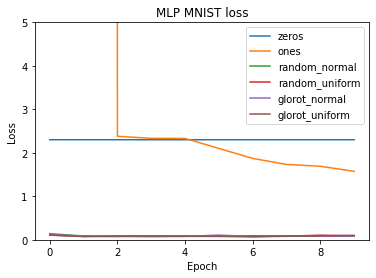

<Figure size 1440x720 with 0 Axes>

None
     Initializors     time accuracy       loss
4   glorot_normal  48.3248   0.9842  0.0809003
2   random_normal  48.2146   0.9819  0.0925913
3  random_uniform  48.7947   0.9818  0.0928243
5  glorot_uniform  47.9185   0.9805   0.102012
1            ones  48.1735   0.4036    1.57381
0           zeros  48.1217   0.1135    2.30099


In [20]:
initializer_list_names = ["zeros", "ones", "random_normal", "random_uniform", "glorot_normal", "glorot_uniform"]

initializers_list = [keras.initializers.Zeros(), 
                    keras.initializers.Ones(),
                    keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=2020),
                    keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=2020),
                    keras.initializers.glorot_normal(seed=2020),
                    keras.initializers.glorot_uniform(seed=2020)]

MLP_model_parameter_tweaker(initializer_list = initializers_list, names = initializer_list_names,  what_is_tested = "Initializors")

Function to compare mnist CNN models

In [35]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255


def CNN_model_parameter_tweaker(optimizer_list = [keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)]*10,
                           activation_list = ["relu"]*10,
                           initializer_list = ['random_uniform']*10,
                           names = ["nothing is tested"]*10,
                           what_is_tested = "no name specified", 
                           epoch = 10):
    df = pd.DataFrame(columns = [what_is_tested, "time", "accuracy", "loss"])
    history_list = []
    epochs = epoch
    for i in range(0,len(names)):


    
        t0 = time.time()
        model = keras.models.Sequential()
        model.add(keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=input_shape, activation=activation_list[i], kernel_initializer = initializer_list[i]))
        model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model.add(keras.layers.Flatten()) # Flattening the 2D arrays for fully connected layers
        model.add(keras.layers.Dense(128, activation=activation_list[i], kernel_initializer = initializer_list[i]))
        model.add(keras.layers.Dropout(0.2))
        model.add(keras.layers.Dense(10,activation="softmax"))


        model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
                  optimizer=optimizer_list[i],             
                  metrics=['accuracy'])

        history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              verbose=1,
              validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)

        t1 = time.time()
        total = t1-t0
        

        df.loc[i,what_is_tested] = names[i]
        df.loc[i,"time"] = total
        df.loc[i,"accuracy"] = score[1]
        df.loc[i,"loss"] = score[0]
        history_list.append(history)
        
    print(plot_parameters(names, hist_list=history_list))
    print(df.sort_values(by=['accuracy'],ascending=False))

optimisers

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 149us/sample - loss: 1.3120 - accuracy: 0.6207 - val_loss: 0.4242 - val_accuracy: 0.8850
Epoch 2/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.4197 - accuracy: 0.8762 - val_loss: 0.3000 - val_accuracy: 0.9152
Epoch 3/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.3301 - accuracy: 0.9036 - val_loss: 0.2517 - val_accuracy: 0.9263
Epoch 4/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.2832 - accuracy: 0.9170 - val_loss: 0.2184 - val_accuracy: 0.9368
Epoch 5/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.2522 - accuracy: 0.9257 - val_loss: 0.1945 - val_accuracy: 0.9424
Epoch 6/10
60000/60000 [==============================] - 8s 142us/sample - loss: 0.2293 - accuracy: 0.9330 - val_loss: 0.1796 - val_accuracy: 0.9478
Epoch 7/10
60000/60000 [==========================

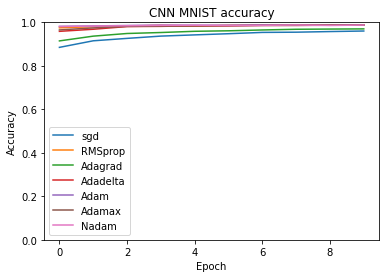

<Figure size 1440x720 with 0 Axes>

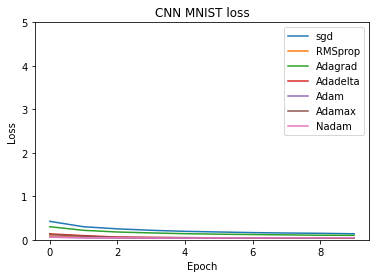

<Figure size 1440x720 with 0 Axes>

None
  optimizers     time accuracy       loss
1    RMSprop  100.395   0.9882  0.0371605
5     Adamax  95.6171    0.988   0.038211
4       Adam  89.6355   0.9879   0.037193
3   Adadelta  97.6927   0.9877  0.0362215
6      Nadam  116.095   0.9877  0.0474656
2    Adagrad  91.3995     0.97   0.102898
0        sgd  86.7496   0.9602   0.138926


In [36]:
CNN_model_parameter_tweaker(optimizer_list = list_optimizers, names = optimizer_names, what_is_tested = "optimizers")

activations

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.2778 - accuracy: 0.9184 - val_loss: 0.1342 - val_accuracy: 0.9602
Epoch 2/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.1156 - accuracy: 0.9658 - val_loss: 0.0822 - val_accuracy: 0.9756
Epoch 3/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0793 - accuracy: 0.9768 - val_loss: 0.0712 - val_accuracy: 0.9785
Epoch 4/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0624 - accuracy: 0.9812 - val_loss: 0.0558 - val_accuracy: 0.9811
Epoch 5/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0498 - accuracy: 0.9846 - val_loss: 0.0570 - val_accuracy: 0.9806
Epoch 6/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.0413 - accuracy: 0.9875 - val_loss: 0.0501 - val_accuracy: 0.9830
Epoch 7/10
60000/60000 [====================

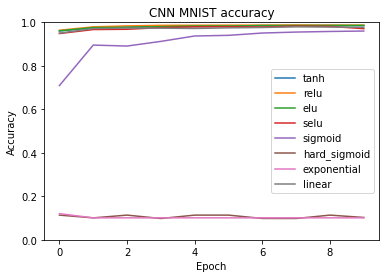

<Figure size 1440x720 with 0 Axes>

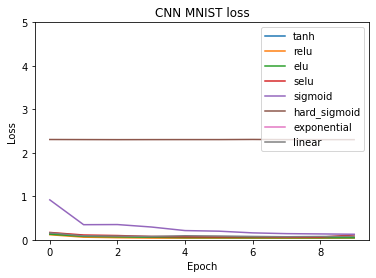

<Figure size 1440x720 with 0 Axes>

None
    activations     time accuracy         loss
1          relu  100.169   0.9873    0.0438405
2           elu  101.249   0.9858    0.0476154
0          tanh  103.039   0.9852     0.046502
7        linear  90.9116   0.9771    0.0797537
3          selu  101.105    0.971     0.112477
4       sigmoid  103.403   0.9601     0.127721
5  hard_sigmoid  133.713   0.1028      2.30259
6   exponential  103.829    0.101  3.39272e+26


In [33]:
CNN_model_parameter_tweaker(activation_list = list_activation_names, names = list_activation_names, what_is_tested = "activations")

initialisers

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 175us/sample - loss: 2.3017 - accuracy: 0.1108 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/10
60000/60000 [==============================] - 10s 165us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/10
60000/60000 [==============================] - 10s 164us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/10
60000/60000 [==============================] - 10s 164us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/10
60000/60000 [==============================] - 10s 164us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 6/10
60000/60000 [==============================] - 10s 164us/sample - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 7/10
60000/60000 [====================

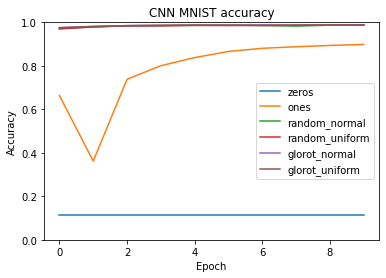

<Figure size 1440x720 with 0 Axes>

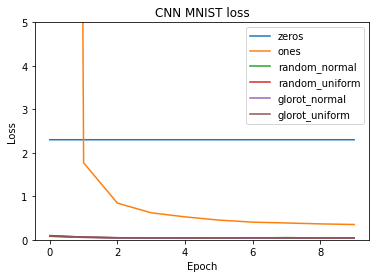

<Figure size 1440x720 with 0 Axes>

None
     Initializors     time accuracy       loss
3  random_uniform  100.265   0.9885  0.0379975
5  glorot_uniform  99.2447   0.9878  0.0428135
2   random_normal  101.066   0.9877  0.0410404
4   glorot_normal  99.3722   0.9875  0.0397298
1            ones  101.219   0.8985   0.351927
0           zeros  100.551   0.1135    2.30102


In [30]:
CNN_model_parameter_tweaker(initializer_list = initializers_list, names = initializer_list_names,  what_is_tested = "Initializors")

Function to compare fashion mnist MLP models

In [47]:
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

batch_size = 128



def MLP_fash_parameter_tweaker(optimizer_list = [keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)]*10,
                           activation_list = ["relu"]*10,
                           initializer_list = ['random_uniform']*10,
                           names = ["nothing is tested"],
                           what_is_tested = "no name specified", 
                           epoch = 10):
    df = pd.DataFrame(columns = [what_is_tested, "time", "accuracy", "loss"])
    history_list = []
    epochs = epoch
    for i in range(0,len(names)):
    
        t0 = time.time()
        
        model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28], name="Input"),
        keras.layers.Dense(300, activation=activation_list[i], kernel_initializer = initializer_list[i], name="Dense1"),
        keras.layers.Dropout(0.2, name="Dropout1"),
        keras.layers.Dense(100, activation=activation_list[i], kernel_initializer = initializer_list[i], name="Dense2"),
        keras.layers.Dropout(0.2, name="Dropout2"),
        keras.layers.Dense(10, activation="softmax", name="Output")
        ])
        
        

        model.compile(loss="sparse_categorical_crossentropy",
                  optimizer = optimizer_list[i],
                  metrics=['accuracy'])


        history = model.fit(X_train_full, y_train_full,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_valid, y_valid))
        score = model.evaluate(X_test, y_test, verbose=0)
        t1 = time.time()
        total = t1-t0

        df.loc[i,what_is_tested] = names[i]
        df.loc[i,"time"] = total
        df.loc[i,"accuracy"] = score[1]
        df.loc[i,"loss"] = score[0]
        history_list.append(history)
        
    print(plot_parameters(names, hist_list=history_list))
    print(df.sort_values(by=['accuracy'],ascending=False))

optimizers

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/sample - loss: 47.9466 - accuracy: 0.0995 - val_loss: 2.3000 - val_accuracy: 0.1548
Epoch 2/10
60000/60000 [==============================] - 2s 41us/sample - loss: 2.1006 - accuracy: 0.1730 - val_loss: 2.3029 - val_accuracy: 0.0986
Epoch 3/10
60000/60000 [==============================] - 2s 40us/sample - loss: 2.0406 - accuracy: 0.1796 - val_loss: 2.3180 - val_accuracy: 0.0986
Epoch 4/10
60000/60000 [==============================] - 2s 40us/sample - loss: 2.0007 - accuracy: 0.1811 - val_loss: 2.3435 - val_accuracy: 0.0986
Epoch 5/10
60000/60000 [==============================] - 2s 40us/sample - loss: 1.9570 - accuracy: 0.1899 - val_loss: 2.3569 - val_accuracy: 0.1450
Epoch 6/10
60000/60000 [==============================] - 2s 41us/sample - loss: 1.7734 - accuracy: 0.2642 - val_loss: 2.3620 - val_accuracy: 0.0982
Epoch 7/10
60000/60000 [==============================] 

Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.5374 - accuracy: 0.8077 - val_loss: 2.2746 - val_accuracy: 0.1202
Epoch 5/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.5032 - accuracy: 0.8216 - val_loss: 2.2739 - val_accuracy: 0.1002
Epoch 6/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4740 - accuracy: 0.8296 - val_loss: 2.2834 - val_accuracy: 0.1004
Epoch 7/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4528 - accuracy: 0.8360 - val_loss: 2.2812 - val_accuracy: 0.1004
Epoch 8/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4261 - accuracy: 0.8453 - val_loss: 2.2810 - val_accuracy: 0.1004
Epoch 9/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4078 - accuracy: 0.8528 - val_loss: 2.2838 - val_accuracy: 0.1012
Epoch 10/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3982 - accuracy: 0.855

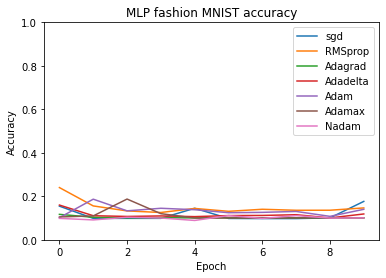

<Figure size 1440x720 with 0 Axes>

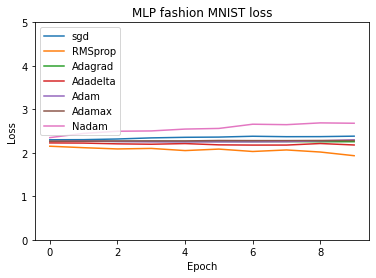

<Figure size 1440x720 with 0 Axes>

None
  optimizers     time accuracy     loss
0        sgd  26.4505   0.1741  2.37888
1    RMSprop  33.1553   0.1458  1.93686
4       Adam  27.8086   0.1383  2.28462
3   Adadelta  31.1469   0.1203  2.17627
2    Adagrad  29.2976   0.1024  2.25372
6      Nadam  44.4962   0.1009  2.67688
5     Adamax  35.4395      0.1  2.27507


In [41]:
MLP_fash_parameter_tweaker(optimizer_list = list_optimizers, names = optimizer_names, what_is_tested = "optimizers")

activations

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.8510 - accuracy: 0.6784 - val_loss: 0.6832 - val_accuracy: 0.7568
Epoch 2/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.6909 - accuracy: 0.7386 - val_loss: 0.6516 - val_accuracy: 0.7496
Epoch 3/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.6369 - accuracy: 0.7592 - val_loss: 0.6391 - val_accuracy: 0.7568
Epoch 4/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.6122 - accuracy: 0.7712 - val_loss: 0.5920 - val_accuracy: 0.7790
Epoch 5/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.5904 - accuracy: 0.7800 - val_loss: 0.5644 - val_accuracy: 0.7974
Epoch 6/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.5788 - accuracy: 0.7845 - val_loss: 0.5654 - val_accuracy: 0.7886
Epoch 7/10
60000/60000 [==============================] -

Epoch 4/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5910 - accuracy: 0.7791 - val_loss: 1.8380 - val_accuracy: 0.5288
Epoch 5/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5701 - accuracy: 0.7896 - val_loss: 1.3066 - val_accuracy: 0.5926
Epoch 6/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5539 - accuracy: 0.7976 - val_loss: 1.4746 - val_accuracy: 0.5874
Epoch 7/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.5500 - accuracy: 0.7998 - val_loss: 1.3753 - val_accuracy: 0.5894
Epoch 8/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5407 - accuracy: 0.8040 - val_loss: 1.2321 - val_accuracy: 0.6234
Epoch 9/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.5442 - accuracy: 0.8036 - val_loss: 1.1751 - val_accuracy: 0.6258
Epoch 10/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.5373 - accuracy: 0.807

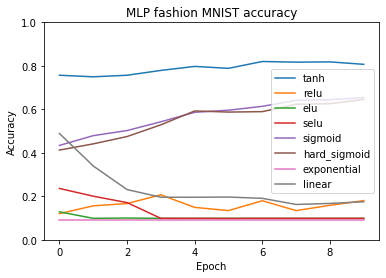

<Figure size 1440x720 with 0 Axes>

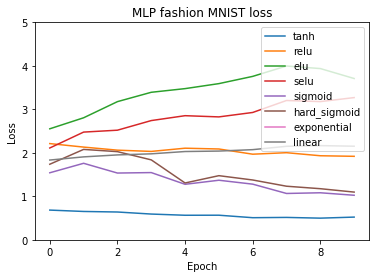

<Figure size 1440x720 with 0 Axes>

None
    activations     time accuracy      loss
0          tanh  34.9762   0.7902  0.553884
4       sigmoid  33.9859   0.6429   1.05421
5  hard_sigmoid  34.7032   0.6362   1.12765
1          relu  35.1116   0.1776   1.92586
7        linear  31.4244   0.1772   2.14414
2           elu  34.1862      0.1   3.67731
3          selu   33.456      0.1   3.24206
6   exponential  33.2416      0.1       NaN


In [45]:
MLP_fash_parameter_tweaker(activation_list = list_activation_names, names = list_activation_names, what_is_tested = "activations")

initialisers

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 63us/sample - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3025 - val_accuracy: 0.1002
Epoch 2/10
60000/60000 [==============================] - 3s 53us/sample - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3025 - val_accuracy: 0.1112
Epoch 3/10
60000/60000 [==============================] - 3s 56us/sample - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.0986
Epoch 4/10
60000/60000 [==============================] - 3s 53us/sample - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3025 - val_accuracy: 0.0980
Epoch 5/10
60000/60000 [==============================] - 3s 53us/sample - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3025 - val_accuracy: 0.1012
Epoch 6/10
60000/60000 [==============================] - 3s 54us/sample - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1012
Epoch 7/10
60000/60000 [==============================] -

Epoch 4/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.9630 - accuracy: 0.6477 - val_loss: 2.1061 - val_accuracy: 0.1626
Epoch 5/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.9338 - accuracy: 0.6635 - val_loss: 2.0560 - val_accuracy: 0.2138
Epoch 6/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.8627 - accuracy: 0.6756 - val_loss: 2.0793 - val_accuracy: 0.1756
Epoch 7/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.8552 - accuracy: 0.6860 - val_loss: 2.0474 - val_accuracy: 0.2406
Epoch 8/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.8316 - accuracy: 0.6909 - val_loss: 2.0468 - val_accuracy: 0.1666
Epoch 9/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.8281 - accuracy: 0.6948 - val_loss: 2.1376 - val_accuracy: 0.1450
Epoch 10/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.8157 - accuracy: 0.699

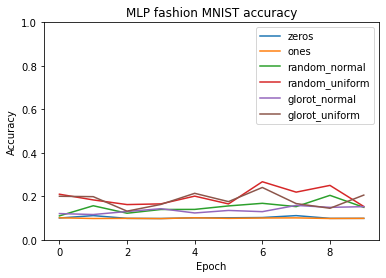

<Figure size 1440x720 with 0 Axes>

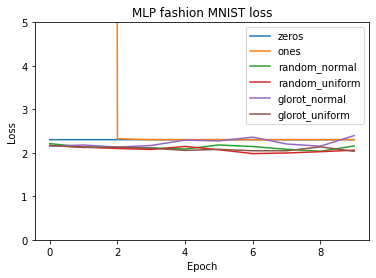

<Figure size 1440x720 with 0 Axes>

None
     Initializors     time accuracy     loss
5  glorot_uniform  31.8436   0.2055   2.0303
4   glorot_normal  31.5038   0.1577  2.39046
3  random_uniform  32.3633   0.1559  2.05522
2   random_normal  31.9199   0.1552  2.15084
0           zeros  33.7475      0.1  2.30261
1            ones  32.4441      0.1  2.30277


In [48]:
MLP_fash_parameter_tweaker(initializer_list = initializers_list, names = initializer_list_names,  what_is_tested = "Initializors")

Function to compare fashion mnist CNN models

In [57]:
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
img_shape = (28, 28, 1)

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], *img_shape)
X_valid = X_valid.reshape(X_valid.shape[0], *img_shape)
X_test = X_test.reshape(X_test.shape[0], *img_shape)

batch_size = 128

def CNN_fash_parameter_tweaker(optimizer_list = [keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)]*10,
                           activation_list = ["relu"]*10,
                           initializer_list = ['random_uniform']*10,
                           names = ["nothing is tested"],
                           what_is_tested = "no name specified", 
                           epoch = 10):
    df = pd.DataFrame(columns = [what_is_tested, "time", "accuracy", "loss"])
    history_list = []
    epochs = epoch
    for i in range(0,len(names)):

        t0 = time.time()
        
        model = keras.models.Sequential([
        keras.layers.Conv2D(filters = 28, kernel_size = 3, activation = activation_list[i], kernel_initializer = initializer_list[i], input_shape = img_shape, name="Conv2D-1"),
        keras.layers.MaxPooling2D(pool_size = 2, name="Pool1"),
        keras.layers.Flatten(name = "Flatten1"),
        keras.layers.Dense(128, activation = activation_list[i], kernel_initializer = initializer_list[i], name="Dense1"),
        keras.layers.Dropout(0.2, name="Dropout1"),
        keras.layers.Dense(10, activation = "softmax", name="Output1")   
    ])
        
        model.compile(loss="sparse_categorical_crossentropy", 
                  optimizer=optimizer_list[i],             
                  metrics=['accuracy'])

        history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epoch,
              verbose=1,
              validation_data=(X_valid, y_valid))
        
        score = model.evaluate(X_test, y_test, verbose=0)

        t1 = time.time()
        total = t1-t0

        df.loc[i,what_is_tested] = names[i]
        df.loc[i,"time"] = total
        df.loc[i,"accuracy"] = score[1]
        df.loc[i,"loss"] = score[0]
        history_list.append(history)
        
    print(plot_parameters(names, hist_list=history_list))
    print(df.sort_values(by=['accuracy'],ascending=False))

initializers

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 9s 168us/sample - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 2/10
55000/55000 [==============================] - 8s 137us/sample - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.0986
Epoch 3/10
55000/55000 [==============================] - 7s 136us/sample - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.0986
Epoch 4/10
55000/55000 [==============================] - 8s 138us/sample - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 5/10
55000/55000 [==============================] - 8s 138us/sample - loss: 2.3027 - accuracy: 0.0967 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 6/10
55000/55000 [==============================] - 8s 141us/sample - loss: 2.3027 - accuracy: 0.0964 - val_loss: 2.3029 - val_accuracy: 0.0914
Epoch 7/10
55000/55000 [===========================

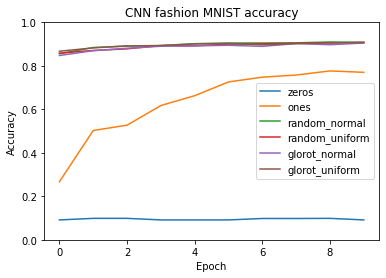

<Figure size 1440x720 with 0 Axes>

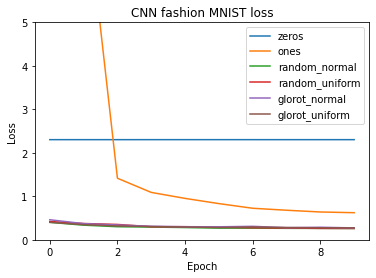

<Figure size 1440x720 with 0 Axes>

None
     Initializors     time accuracy      loss
4   glorot_normal  75.8043   0.9038  0.282309
5  glorot_uniform  75.9152   0.9021   0.27883
2   random_normal  75.7488   0.9018  0.273713
3  random_uniform  76.2711   0.9017   0.28398
1            ones   77.779   0.7514  0.654533
0           zeros  79.2366      0.1    2.3026


In [51]:
CNN_fash_parameter_tweaker(initializer_list = initializers_list, names = initializer_list_names,  what_is_tested = "Initializors")

optimisers

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 154us/sample - loss: 1.2924 - accuracy: 0.5677 - val_loss: 0.7218 - val_accuracy: 0.7444
Epoch 2/10
55000/55000 [==============================] - 8s 137us/sample - loss: 0.6943 - accuracy: 0.7501 - val_loss: 0.5784 - val_accuracy: 0.7956
Epoch 3/10
55000/55000 [==============================] - 8s 139us/sample - loss: 0.6068 - accuracy: 0.7805 - val_loss: 0.5368 - val_accuracy: 0.8130
Epoch 4/10
55000/55000 [==============================] - 8s 138us/sample - loss: 0.5573 - accuracy: 0.7998 - val_loss: 0.4954 - val_accuracy: 0.8248
Epoch 5/10
55000/55000 [==============================] - 8s 139us/sample - loss: 0.5243 - accuracy: 0.8118 - val_loss: 0.4738 - val_accuracy: 0.8352
Epoch 6/10
55000/55000 [==============================] - 8s 138us/sample - loss: 0.5032 - accuracy: 0.8195 - val_loss: 0.4644 - val_accuracy: 0.8398
Epoch 7/10
55000/55000 [===========================

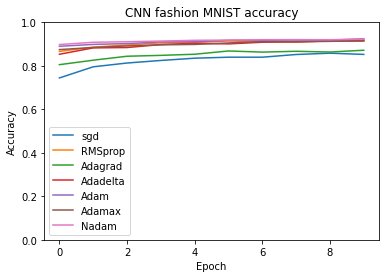

<Figure size 1440x720 with 0 Axes>

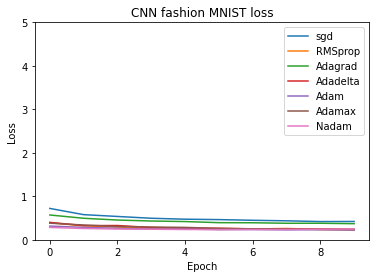

<Figure size 1440x720 with 0 Axes>

None
  optimizers     time accuracy      loss
1    RMSprop  89.9027   0.9149  0.241587
6      Nadam  106.888   0.9147  0.257606
4       Adam  86.6167   0.9131  0.247394
3   Adadelta  92.7829   0.9108  0.249534
5     Adamax  90.9323   0.9084  0.248898
2    Adagrad  83.3112   0.8569  0.403076
0        sgd  78.5899   0.8385  0.449529


In [58]:
CNN_fash_parameter_tweaker(optimizer_list = list_optimizers, names = optimizer_names, what_is_tested = "optimizers")

activations

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 9s 155us/sample - loss: 0.6175 - accuracy: 0.7888 - val_loss: 0.4150 - val_accuracy: 0.8568
Epoch 2/10
55000/55000 [==============================] - 8s 144us/sample - loss: 0.4203 - accuracy: 0.8549 - val_loss: 0.3651 - val_accuracy: 0.8712
Epoch 3/10
55000/55000 [==============================] - 8s 150us/sample - loss: 0.3725 - accuracy: 0.8706 - val_loss: 0.3364 - val_accuracy: 0.8812
Epoch 4/10
55000/55000 [==============================] - 8s 144us/sample - loss: 0.3419 - accuracy: 0.8807 - val_loss: 0.3186 - val_accuracy: 0.8876
Epoch 5/10
55000/55000 [==============================] - 8s 144us/sample - loss: 0.3233 - accuracy: 0.8876 - val_loss: 0.3121 - val_accuracy: 0.8888
Epoch 6/10
55000/55000 [==============================] - 8s 144us/sample - loss: 0.3059 - accuracy: 0.8935 - val_loss: 0.3094 - val_accuracy: 0.8912
Epoch 7/10
55000/55000 [===========================

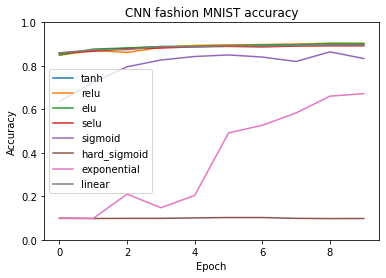

<Figure size 1440x720 with 0 Axes>

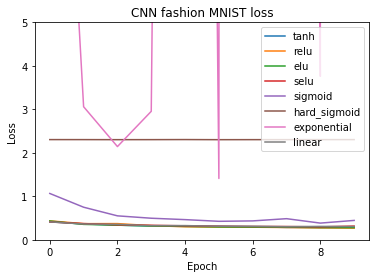

<Figure size 1440x720 with 0 Axes>

None
    activations     time accuracy        loss
2           elu  80.4812   0.8985    0.285004
1          relu  79.8385   0.8981    0.282385
0          tanh  85.0579   0.8928    0.300834
7        linear  72.4161   0.8893    0.312001
3          selu   80.962   0.8866    0.322536
4       sigmoid  83.2131   0.8224     0.47367
6   exponential  82.8571   0.6552  9.4272e+10
5  hard_sigmoid  109.156      0.1     2.30332


In [54]:
CNN_fash_parameter_tweaker(activation_list = list_activation_names, names = list_activation_names, what_is_tested = "activations")

# Task 2

MLP model mnist on permuted data

In [9]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

batch_size = 128
num_classes = 10
epochs = 40

X_train_full = X_train_full.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train_full = X_train_full.astype('float32')
X_test = X_test.astype('float32')
X_train_full /= 255
X_test /= 255

X_train_perm = np.zeros((60000,784))
for i in range(60000):
    X_train_perm[i] = X_train_full[i]
    np.random.seed(42)
    X_train_perm[i] = np.random.permutation(X_train_perm[i])

X_test_perm = np.zeros((10000,784))
for i in range(10000):
    X_test_perm[i] = X_test[i]
    np.random.seed(42)
    X_test_perm[i] = np.random.permutation(X_test_perm[i])

y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.models.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=(784,), kernel_initializer = "glorot_normal"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(512, activation='relu', kernel_initializer = "glorot_normal"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer = keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999),
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train_perm, y_train_full,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test_perm, y_test),
                    callbacks=[checkpoint_cb, early_stopping_cb])
score3 = model.evaluate(X_test_perm, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

model.save("my_keras_model.h5")
history_MLP_perm = history

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 5s 88u

CNN model mnist on permuted data

In [10]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

x_train_perm = np.zeros((60000,28,28,1))
for i in range(60000):
    x_train_perm[i] = x_train[i]
    np.random.seed(42)
    x_train_perm[i] = np.random.permutation(x_train_perm[i])

x_test_perm = np.zeros((10000,28,28,1))
for i in range(10000):
    x_test_perm[i] = x_test[i]
    np.random.seed(42)
    x_test_perm[i] = np.random.permutation(x_test_perm[i])

    
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=input_shape, activation="relu", kernel_initializer = "random_uniform"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(keras.layers.Dense(128, activation="relu", kernel_initializer = "random_uniform"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10,activation="softmax"))

model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9),             
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(x_train_perm, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_perm, y_test),
          callbacks=[checkpoint_cb, early_stopping_cb])
score4 = model.evaluate(x_test_perm, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

model.save("my_keras_model.h5")
history_CNN_perm = history

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 11s 178us/sample - loss: 0.3634 - accuracy: 0.8888 - val_loss: 0.1636 - val_accuracy: 0.9479
Epoch 2/40
60000/60000 [==============================] - 10s 167us/sample - loss: 0.1403 - accuracy: 0.9578 - val_loss: 0.0914 - val_accuracy: 0.9723
Epoch 3/40
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0990 - accuracy: 0.9698 - val_loss: 0.0853 - val_accuracy: 0.9735
Epoch 4/40
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0796 - accuracy: 0.9756 - val_loss: 0.0656 - val_accuracy: 0.9789
Epoch 5/40
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0660 - accuracy: 0.9798 - val_loss: 0.0707 - val_accuracy: 0.9792
Epoch 6/40
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0558 - accuracy: 0.9827 - val_loss: 0.0602 - val_accuracy: 0.9820
Epoch 7/40
60000/60000 [====================

Fashion MLP permutation model

In [11]:
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

X_train_perm = np.zeros((55000,28,28))
for i in range(X_train.shape[0]):
    X_train_perm[i] = X_train[i]
    np.random.seed(42)
    X_train_perm[i] = np.random.permutation(X_train_perm[i])
    
X_valid_perm = np.zeros((5000,28,28))
for i in range(X_valid.shape[0]):
    X_valid_perm[i] = X_valid[i]
    np.random.seed(42)
    X_valid_perm[i] = np.random.permutation(X_valid_perm[i])

X_test_perm = np.zeros((10000,28,28))
for i in range(X_test.shape[0]):
    X_test_perm[i] = X_test[i]
    np.random.seed(42)
    X_test_perm[i] = np.random.permutation(X_test_perm[i])

batch_size = 128
epochs = 40

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28], name="Input"),
    keras.layers.Dense(512, activation="tanh", kernel_initializer = "random_uniform", name="Dense1"),
    keras.layers.Dropout(0.2, name="Dropout1"),
    keras.layers.Dense(512, activation="tanh", kernel_initializer = "random_uniform", name="Dense2"),
    keras.layers.Dropout(0.2, name="Dropout2"),
    keras.layers.Dense(10, activation="softmax", name="Output")
])

model.summary()

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9), 
              metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train_perm, y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data=(X_valid_perm, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]
                    )

score5 = model.evaluate(X_test_perm, y_test)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

model.save("my_keras_model.h5")
history_MLP_fash_perm = history

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 784)               0         
_________________________________________________________________
Dense1 (Dense)               (None, 512)               401920    
_________________________________________________________________
Dropout1 (Dropout)           (None, 512)               0         
_________________________________________________________________
Dense2 (Dense)               (None, 512)               262656    
_________________________________________________________________
Dropout2 (Dropout)           (None, 512)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

 Fashion CNN permutation model

In [12]:
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
img_shape = (28, 28, 1)

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], *img_shape)
X_valid = X_valid.reshape(X_valid.shape[0], *img_shape)
X_test = X_test.reshape(X_test.shape[0], *img_shape)

X_train_perm = np.zeros((55000,28,28,1))
for i in range(X_train.shape[0]):
    X_train_perm[i] = X_train[i]
    np.random.seed(42)
    X_train_perm[i] = np.random.permutation(X_train_perm[i])
    
X_valid_perm = np.zeros((5000,28,28,1))
for i in range(X_valid.shape[0]):
    X_valid_perm[i] = X_valid[i]
    np.random.seed(42)
    X_valid_perm[i] = np.random.permutation(X_valid_perm[i])

X_test_perm = np.zeros((10000,28,28,1))
for i in range(X_test.shape[0]):
    X_test_perm[i] = X_test[i]
    np.random.seed(42)
    X_test_perm[i] = np.random.permutation(X_test_perm[i])

batch_size = 128
epochs = 40

model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 28, kernel_size = 3, activation = "relu", input_shape = img_shape, kernel_initializer = 'glorot_uniform', name="Conv2D-1"),
    keras.layers.MaxPooling2D(pool_size = 2, name="Pool1"),
    keras.layers.Flatten(name = "Flatten1"),
    keras.layers.Dense(128, activation = "relu", kernel_initializer = 'glorot_uniform', name="Dense1"),
    keras.layers.Dropout(0.2, name="Dropout1"),
    keras.layers.Dense(10, activation = "softmax", name="Output1")   
])

model.summary()

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer = keras.optimizers.Nadam(lr=0.001), 
              metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train_perm, y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    verbose = 1,
                    validation_data=(X_valid_perm, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]
                    )

score6 = model.evaluate(X_test_perm, y_test)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

model.save("my_keras_model.h5")
history_CNN_fash_perm = history

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 13, 13, 28)        0         
_________________________________________________________________
Flatten1 (Flatten)           (None, 4732)              0         
_________________________________________________________________
Dense1 (Dense)               (None, 128)               605824    
_________________________________________________________________
Dropout1 (Dropout)           (None, 128)               0         
_________________________________________________________________
Output1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

Optimal MLP model Fashion mnist (on non permuted data)

In [13]:
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

batch_size = 128
epochs = 40

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28], name="Input"),
    keras.layers.Dense(512, activation="tanh", kernel_initializer = "random_uniform", name="Dense1"),
    keras.layers.Dropout(0.2, name="Dropout1"),
    keras.layers.Dense(512, activation="tanh", kernel_initializer = "random_uniform", name="Dense2"),
    keras.layers.Dropout(0.2, name="Dropout2"),
    keras.layers.Dense(10, activation="softmax", name="Output")
])

model.summary()

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9), 
              metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]
                    )

score7 = model.evaluate(X_test, y_test)
print('Test loss:', score7[0])
print('Test accuracy:', score7[1])

model.save("my_keras_model.h5")
history_MLP_fash = history

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 784)               0         
_________________________________________________________________
Dense1 (Dense)               (None, 512)               401920    
_________________________________________________________________
Dropout1 (Dropout)           (None, 512)               0         
_________________________________________________________________
Dense2 (Dense)               (None, 512)               262656    
_________________________________________________________________
Dropout2 (Dropout)           (None, 512)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

Optimal CNN model Fashion mnist (on non permuted data)

In [14]:
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
img_shape = (28, 28, 1)

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], *img_shape)
X_valid = X_valid.reshape(X_valid.shape[0], *img_shape)
X_test = X_test.reshape(X_test.shape[0], *img_shape)

batch_size = 128
epochs = 40

model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 28, kernel_size = 3, activation = "relu", input_shape = img_shape, kernel_initializer = 'glorot_uniform', name="Conv2D-1"),
    keras.layers.MaxPooling2D(pool_size = 2, name="Pool1"),
    keras.layers.Flatten(name = "Flatten1"),
    keras.layers.Dense(128, activation = "relu", kernel_initializer = 'glorot_uniform', name="Dense1"),
    keras.layers.Dropout(0.2, name="Dropout1"),
    keras.layers.Dense(10, activation = "softmax", name="Output1")   
])

model.summary()

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer = keras.optimizers.Nadam(lr=0.001), 
              metrics=["accuracy"])

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    verbose = 1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]
                    )

score8 = model.evaluate(X_test, y_test)
print('Test loss:', score8[0])
print('Test accuracy:', score8[1])

model.save("my_keras_model.h5")
history_CNN_fash = history

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
Pool1 (MaxPooling2D)         (None, 13, 13, 28)        0         
_________________________________________________________________
Flatten1 (Flatten)           (None, 4732)              0         
_________________________________________________________________
Dense1 (Dense)               (None, 128)               605824    
_________________________________________________________________
Dropout1 (Dropout)           (None, 128)               0         
_________________________________________________________________
Output1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_______________________________________________

Comparing Permutations with non-permuted networks for mnist

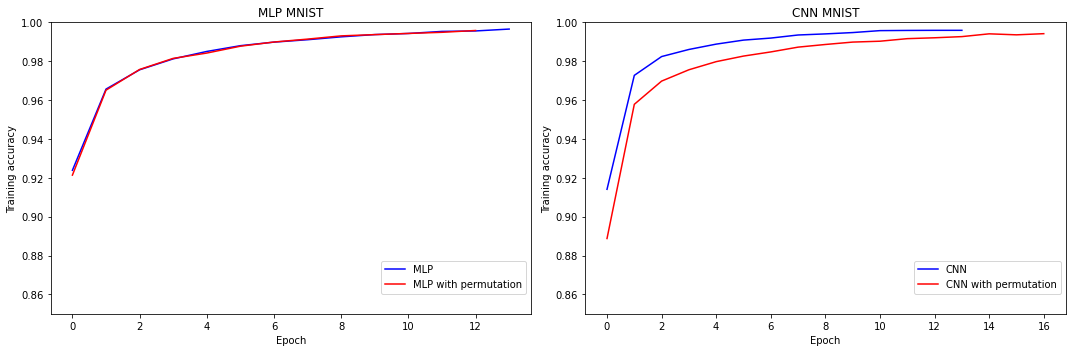

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].plot(range(len(history_MLP.history["accuracy"])), history_MLP.history["accuracy"], color="blue", label="MLP")
axs[0].plot(range(len(history_MLP_perm.history["accuracy"])), history_MLP_perm.history["accuracy"], color="red", label = "MLP with permutation")
axs[0].set_title("MLP MNIST")
axs[0].set_ylabel('Training accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylim(0.85, 1)
axs[0].legend(bbox_to_anchor=(1.0,0.2))

axs[1].plot(range(len(history_CNN.history["accuracy"])), history_CNN.history["accuracy"], color="blue", label="CNN")
axs[1].plot(range(len(history_CNN_perm.history["accuracy"])), history_CNN_perm.history["accuracy"], color="red", label="CNN with permutation")
axs[1].set_title("CNN MNIST")
axs[1].set_ylabel('Training accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylim(0.85, 1)
axs[1].legend(bbox_to_anchor=(1.0,0.2))

plt.tight_layout()
plt.savefig('task2_mnist.png', dpi=300)

Test acc MLP mnist vs MLP permutated mnist

In [29]:
print(score1[1], score3[1])
print(score1[1] - score3[1])

0.9831 0.9836
-0.00050002337


Test acc CNN mnist vs CNN permutated mnist

In [30]:
print(score2[1], score4[1])
print(score2[1] - score4[1])

0.989 0.9839
0.005100012


Comparing Permutations with non-permuted networks for Fashion mnist

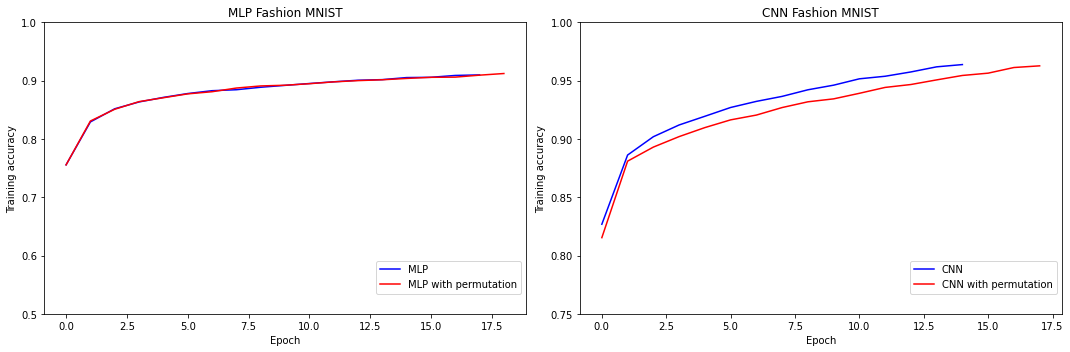

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].plot(range(len(history_MLP_fash.history["accuracy"])), history_MLP_fash.history["accuracy"], color="blue", label="MLP")
axs[0].plot(range(len(history_MLP_fash_perm.history["accuracy"])), history_MLP_fash_perm.history["accuracy"], color="red", label = "MLP with permutation")
axs[0].set_title("MLP Fashion MNIST")
axs[0].set_ylabel('Training accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylim(0.5, 1)
axs[0].legend(bbox_to_anchor=(1.0,0.2))

axs[1].plot(range(len(history_CNN_fash.history["accuracy"])), history_CNN_fash.history["accuracy"], color="blue", label="CNN")
axs[1].plot(range(len(history_CNN_fash_perm.history["accuracy"])), history_CNN_fash_perm.history["accuracy"], color="red", label="CNN with permutation")
axs[1].set_title("CNN Fashion MNIST")
axs[1].set_ylabel('Training accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylim(0.75, 1)
axs[1].legend(bbox_to_anchor=(1.0,0.2))

plt.tight_layout()
plt.savefig('task2_fashion_mnist.png', dpi=300)

Test acc MLP fashion mnist vs MLP permutated fashion mnist

In [31]:
print(score7[1], score5[1])
print(score7[1] - score5[1])

0.8824 0.8819
0.00049996376


Test acc CNN fashion mnist vs CNN permutated fashion mnist

In [32]:
print(score8[1], score6[1])
print(score8[1] - score6[1])

0.9134 0.9111
0.002300024


In [ ]:
os.chdir("D:/master/Neural networks/ass 2")

# Task 3

In [5]:
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import numpy as np

loc = os.getcwd()
images = np.load(loc+"/images.npy")
labels = np.load(loc+"/labels.npy")

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=25)

x_train = x_train.reshape(x_train.shape[0], 150, 150, 1)
x_test = x_test.reshape(x_test.shape[0], 150, 150, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

inp = keras.layers.Input(shape=(150,150, 1))
inp.shape

x = keras.layers.Conv2D(50, kernel_size=5, strides=2, activation='relu')(inp)
x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
x = keras.layers.Conv2D(100, kernel_size=3, strides=1, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(150, kernel_size=3, strides=1, activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Conv2D(200, kernel_size=3, strides=1, activation='relu')(x)
x = keras.layers.Dropout(.2)(x)
x = keras.layers.Flatten()(x)

hour = keras.layers.Dense(150, activation='relu')(x)
hour = keras.layers.Dense(150, activation='relu')(hour)
hour = keras.layers.Dense(12, activation='softmax', name='hour')(hour)

minute = keras.layers.Dense(100, activation='relu')(x)
minute = keras.layers.Dense(200, activation='relu')(minute)
minute = keras.layers.Dense(1, activation='linear', name='minute')(minute)

model = keras.Model(inputs=inp, outputs=[hour, minute])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 1) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 73, 73, 50)   1300        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 36, 36, 50)   0           conv2d_4[0][0]                   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 34, 34, 100)  45100       max_pooling2d_3[0][0]            
____________________________________________________________________________________________

In [2]:
model.compile(loss=['sparse_categorical_crossentropy', 'mse'], 
              optimizer=tf.keras.optimizers.Adam(),             
              metrics=['accuracy', 'mae'])

In [3]:
y1_train = np.zeros(14400, int)
y2_train = np.zeros(14400)
y1_test = np.zeros(3600)
y2_test = np.zeros(3600)

for i in range(0,14400):
    y1_train[i] = y_train[i,0]
    y2_train[i] = y_train[i,1]/60
    
for i in range(0,3600):
    y1_test[i] = y_test[i,0]
    y2_test[i] = y_test[i,1]/60

In [4]:
history =model.fit(x_train, [y1_train, y2_train], epochs=12, batch_size=256, validation_data=(x_test, [y1_test, y2_test]))

score = model.evaluate(x_test, [y1_test, y2_test], verbose=0)
print('Test hour loss:', score[1])
print('Test minute loss:', score[2])
print('Test hour accuracy:', score[3])
print('Test hour mae:', score[4])
print('Test minute accuracy:', score[5])
print('Test minute mae:', score[6])

Train on 14400 samples, validate on 3600 samples
Epoch 1/12
  256/14400 [..............................] - ETA: 4:30

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model/conv2d/Conv2D (defined at <ipython-input-4-2ef462206da0>:1) ]] [Op:__inference_distributed_function_1958]

Function call stack:
distributed_function


In [ ]:
def clock_model_parameter_tweaker(optimizer_list = [keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)]*10,
                           activation_list = ["relu"]*10,
                           initializer_list = ['random_uniform']*10,
                           names = ["nothing is tested"],
                           what_is_tested = "no name specified", 
                           epoch = 10):
    df = pd.DataFrame(columns = [what_is_tested, "time", "minute accuracy", "minute loss"])
    history_list = []
    epochs = epoch
    for i in range(0,len(names)):
        
        ####
        t0 = time.time()
        inp = keras.layers.Input(shape=(150,150, 1))
 
        x = keras.layers.Conv2D(50, kernel_size=5, strides=2, activation='relu')(inp)
        x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)
        x = keras.layers.Conv2D(100, kernel_size=3, strides=1, activation='relu')(x)
        x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
        x = keras.layers.Conv2D(150, kernel_size=3, strides=1, activation='relu')(x)
        x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
        x = keras.layers.Conv2D(200, kernel_size=3, strides=1, activation='relu')(x)
        x = keras.layers.Dropout(.2)(x)
        x = keras.layers.Flatten()(x)

        hour = keras.layers.Dense(150, activation='relu')(x)
        hour = keras.layers.Dense(150, activation='relu')(hour)
        hour = keras.layers.Dense(12, activation='softmax', name='hour')(hour)

        minute = keras.layers.Dense(100, activation='relu')(x)
        minute = keras.layers.Dense(200, activation='relu')(minute)
        minute = keras.layers.Dense(1, activation='linear', name='minute')(minute)

        model = keras.Model(inputs=inp, outputs=[hour, minute])
        model.compile(loss=['sparse_categorical_crossentropy', 'mse'], 
                      optimizer=optimizer_list[i],             
                      metrics=['accuracy', 'mae'])

        
        history = model.fit(x_train, [y1_train, y2_train], epochs=12, batch_size=256, validation_data=(x_test, [y1_test, y2_test]))
        
        score = model.evaluate(x_test, [y1_test, y2_test], verbose=0)
        t1 = time.time()
        total = t1-t0
        df.loc[i,what_is_tested] = names[i]
        df.loc[i,"time"] = total
        df.loc[i,"minute accuracy"] = score[5]
        df.loc[i,"minute loss"] = score[2]
        history_list.append(history)
        
        print('Test hour loss:', score[1])
        print('Test minute loss:', score[2])
        print('Test hour accuracy:', score[3])
        print('Test hour mae:', score[4])
        print('Test minute accuracy:', score[5])
        print('Test minute mae:', score[6])
        
    print(plot_parameters(parameter_list_names = names, 
                          hist_list = history_list, 
                          accuracy ='minute_accuracy', 
                          loss = 'minute_loss', 
                          yab = .2, 
                          yal = .5))
    print(df.sort_values(by=['minute accuracy'],ascending=False))




optimisers

In [ ]:
list_optimizers = ["sgd", 
                   keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9), 
                   keras.optimizers.Adagrad(learning_rate=0.01),
                   keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95), 
                   keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
                   keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999),
                   keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)]

optimizer_names = ["sgd", "RMSprop", "Adagrad", "Adadelta", "Adam", "Adamax", "Nadam"]




clock_model_parameter_tweaker(optimizer_list = list_optimizers, names = optimizer_names, what_is_tested = "optimizers")

activations

In [ ]:
list_activation_names = ["tanh", "relu", "elu", "selu", "sigmoid", "hard_sigmoid", "exponential", "linear"]

clock_model_parameter_tweaker(activation_list = list_activation_names, names = list_activation_names, what_is_tested = "activations")

initialisers

In [ ]:
initializer_list_names = ["zeros", "ones", "random_normal", "random_uniform", "glorot_normal", "glorot_uniform"]

initializers_list = [keras.initializers.Zeros(), 
                    keras.initializers.Ones(),
                    keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=2020),
                    keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=2020),
                    keras.initializers.glorot_normal(seed=2020),
                    keras.initializers.glorot_uniform(seed=2020)]


clock_model_parameter_tweaker(initializer_list = initializers_list, names = initializer_list_names,  what_is_tested = "Initializors")